In [282]:
import pandas as pd
import numpy as np
import random 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Simulation2

In [266]:
df_for_graph = pd.DataFrame(np.nan, index=range(0, 30), columns= ("Node_Number", "Timestamp_Normal_Reached"))

NumSim = 5

## 50 Suspectible Nodes

In [271]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 100000 
N = 50 
Z = 2  
P = 2

In [272]:
df_initial_opinions_50 = pd.read_excel("EndOpinions_50.xlsx")
df_initial_opinions_50 = df_initial_opinions_50.drop(columns=['Unnamed: 0'])
df_initial_opinions_50

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,0.067500,0.945000,0.908750,0.175000,0.983125,0.968750,0.938125,0.112500,0.195000,0.910,...,0.012656,0.940000,0.072500,0.877500,0.032500,0.019375,0.200000,0.938750,1,0
1,0.070625,0.970781,0.018027,0.225000,0.995938,0.021240,0.006945,0.049766,0.940000,0.115,...,0.005898,0.970313,0.016289,0.021240,0.765000,0.975000,0.073750,0.985313,1,0
2,0.952637,0.056250,0.011875,0.943125,0.014063,0.995625,0.000508,0.790000,0.902500,0.145,...,0.805000,0.981875,0.989375,0.020273,0.024375,0.976641,0.080937,0.111250,1,0
3,0.991116,0.978438,0.021250,0.195000,0.001719,0.001641,0.011720,0.116250,0.952500,0.235,...,0.006133,0.973281,0.978438,0.911250,0.800000,0.005860,0.808750,0.981328,1,0
4,0.073438,0.061562,0.949062,0.938750,0.010049,0.020771,0.000244,0.760000,0.029375,0.245,...,0.906250,0.974219,0.988437,0.907188,0.935000,0.980000,0.825000,0.972500,1,0


In [273]:
for k in range(0, NumSim):
    df_for_graph.loc[k,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_50.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(extremists > 0.05 and i < t_max):
    #while(extremists > 0.05):
    #while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k,"Timestamp_Normal_Reached"] = i

0 - Initial Extremists: 0.9615384615384616
Going into while 0
0 - End Extremists: 0.038461538461538464
1 - Initial Extremists: 0.9615384615384616
Going into while 1


KeyboardInterrupt: 

In [109]:
# df_for_graph.to_excel("Graph1Sim2_50.xlsx")

## 100 Suspectible Nodes

In [110]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 100000 
N = 100
Z = 4 
P = 4

In [111]:
df_initial_opinions_100 = pd.read_excel("EndOpinions_100.xlsx")
df_initial_opinions_100 = df_initial_opinions_100.drop(columns=['Unnamed: 0'])
df_initial_opinions_100

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,101,102,103,104
0,0.966484,0.063281,0.027588,0.103750,0.076328,0.030371,0.030776,0.965000,0.994077,0.997039,...,0.028750,0.079375,0.755000,0.060742,0.026865,0.011562,1,0,1,0
1,0.029066,0.971602,0.005039,0.947500,0.991523,0.993125,0.981641,0.028281,0.992578,0.045098,...,0.987832,0.999297,0.755000,0.020000,0.994063,0.014766,1,0,1,0
2,0.022485,0.072031,0.970000,0.190000,0.945000,0.021177,0.220000,0.961250,0.029531,0.993945,...,0.988750,0.998594,0.758125,0.051035,0.994687,0.026250,1,0,1,0
3,0.969062,0.995313,0.971875,0.948125,0.056328,0.971797,0.979375,0.948750,0.994512,0.994512,...,0.986250,0.022187,0.021576,0.031328,0.986289,0.986563,1,0,1,0
4,0.026582,0.046875,0.971250,0.968750,0.971016,0.998735,0.980488,0.030000,0.983281,0.011318,...,0.023750,0.076172,0.875000,0.026250,0.995469,0.985625,1,0,1,0


In [112]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 1 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_100.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(extremists > 0.05 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 1 * NumSim,"Timestamp_Normal_Reached"] = i

0 - Initial Extremists: 0.9519230769230769
Going into while 0
0 - End Extremists: 0.04807692307692308
1 - Initial Extremists: 0.9519230769230769
Going into while 1
1 - End Extremists: 0.04807692307692308
2 - Initial Extremists: 0.9519230769230769
Going into while 2
2 - End Extremists: 0.04807692307692308
3 - Initial Extremists: 0.9519230769230769
Going into while 3
3 - End Extremists: 0.04807692307692308
4 - Initial Extremists: 0.9519230769230769
Going into while 4
4 - End Extremists: 0.04807692307692308


In [114]:
# df_for_graph.to_excel("Graph1Sim2_100.xlsx")

## 200 Suspectible Nodes

In [115]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 100000 
N = 200
Z = 10
P = 10

In [116]:
df_initial_opinions_200 = pd.read_excel("EndOpinions_200.xlsx")
df_initial_opinions_200 = df_initial_opinions_200.drop(columns=['Unnamed: 0'])
df_initial_opinions_200

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
0,0.877500,0.075937,0.097500,0.117500,0.028750,0.003750,0.978750,0.034688,0.987187,0.061250,...,1,0,1,0,1,0,1,0,1,0
1,0.071250,0.988535,0.905625,0.972266,0.014375,0.907500,0.060625,0.984531,0.992812,0.016094,...,1,0,1,0,1,0,1,0,1,0
2,0.948750,0.994402,0.065000,0.958857,0.886250,0.003750,0.038750,0.027031,0.974006,0.933125,...,1,0,1,0,1,0,1,0,1,0
3,0.985000,0.994785,0.122500,0.061875,0.017188,0.920000,0.046562,0.023750,0.052187,0.973750,...,1,0,1,0,1,0,1,0,1,0
4,0.968906,0.225000,0.085000,0.984219,0.022812,0.013589,0.032969,0.026250,0.976836,0.974375,...,1,0,1,0,1,0,1,0,1,0


In [117]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 2 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_200.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k) 

    
    while(extremists > 0.05 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion

            
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 2 * NumSim,"Timestamp_Normal_Reached"] = i

0 - Initial Extremists: 0.9523809523809523
Going into while 0
0 - End Extremists: 0.047619047619047616
1 - Initial Extremists: 0.9523809523809523
Going into while 1
1 - End Extremists: 1.0
2 - Initial Extremists: 0.9523809523809523
Going into while 2
2 - End Extremists: 1.0
3 - Initial Extremists: 0.9523809523809523
Going into while 3
3 - End Extremists: 0.047619047619047616
4 - Initial Extremists: 0.9523809523809523
Going into while 4
4 - End Extremists: 0.047619047619047616


In [119]:
# df_for_graph.to_excel("Graph1Sim2_200.xlsx")

## 300 Suspectible Nodes

In [143]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 100000 
N = 300
Z = 14
P = 14

In [144]:
df_initial_opinions_300 = pd.read_excel("EndOpinions_300.xlsx")
df_initial_opinions_300 = df_initial_opinions_300.drop(columns=['Unnamed: 0'])
df_initial_opinions_300

,1,2,3,4,5,6,7,8,9,10,...,305,306,307,308,309,310,311,312,313,314
0,0.954063,0.015000,0.031035,0.097656,0.028750,0.005508,0.81000,0.958750,0.006562,0.210000,...,1,0,1,0,1,0,1,0,1,0
1,0.976719,0.010000,0.936641,0.106094,0.033750,0.006719,0.03416,0.041250,0.006719,0.995156,...,1,0,1,0,1,0,1,0,1,0
2,0.950000,0.008828,0.036875,0.957500,0.795000,0.005781,0.04416,0.955000,0.964922,0.245000,...,1,0,1,0,1,0,1,0,1,0
3,0.942500,0.007578,0.036738,0.107500,0.835000,0.990879,0.78500,0.974844,0.004219,0.115000,...,1,0,1,0,1,0,1,0,1,0
4,0.955313,0.007500,0.920312,0.065000,0.034219,0.971250,0.76250,0.021875,0.007812,0.227500,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 3 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_300.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(extremists > 0.05 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 3 * NumSim,"Timestamp_Normal_Reached"] = i

0 - Initial Extremists: 0.9522292993630573
Going into while 0


In [ ]:
# df_for_graph.to_excel("Graph1Sim2_300.xlsx")

## 400 Suspectible Nodes

In [215]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 100000 
N = 400
Z = 20
P = 20

In [216]:
df_initial_opinions_400 = pd.read_excel("EndOpinions_400.xlsx")
df_initial_opinions_400 = df_initial_opinions_400.drop(columns=['Unnamed: 0'])
df_initial_opinions_400

,1,2,3,4,5,6,7,8,9,10,...,411,412,413,414,415,416,417,418,419,420
0,0.991044,0.988828,0.956172,0.976270,0.014107,0.8950,0.061250,0.980293,0.037307,0.780000,...,1,0,1,0,1,0,1,0,1,0
1,0.983040,0.978125,0.981191,0.171250,0.010547,0.1225,0.991289,0.955000,0.040923,0.029375,...,1,0,1,0,1,0,1,0,1,0
2,0.022617,0.205000,0.945000,0.958438,0.933750,0.9400,0.990820,0.948125,0.969844,0.765000,...,1,0,1,0,1,0,1,0,1,0
3,0.011914,0.185000,0.040742,0.235000,0.918359,0.0750,0.993984,0.015352,0.112500,0.030625,...,1,0,1,0,1,0,1,0,1,0
4,0.988769,0.240000,0.979872,0.955000,0.958887,0.1025,0.041250,0.044336,0.040059,0.750000,...,1,0,1,0,1,0,1,0,1,0


In [217]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 4 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_400.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(extremists > 0.05 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 4 * NumSim,"Timestamp_Normal_Reached"] = i

0 - Initial Extremists: 0.95
Going into while 0
0 - End Extremists: 0.05
1 - Initial Extremists: 0.95
Going into while 1
1 - End Extremists: 0.05
2 - Initial Extremists: 0.95
Going into while 2
2 - End Extremists: 0.06904761904761905
3 - Initial Extremists: 0.95
Going into while 3
3 - End Extremists: 0.07142857142857142
4 - Initial Extremists: 0.95
Going into while 4
4 - End Extremists: 0.05


In [219]:
##df_for_graph.to_excel("Graph1Sim2_400.xlsx")

## 500 Suspectible Nodes

In [205]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 100000 
N = 500
Z = 24
P = 24

In [206]:
df_initial_opinions_500 = pd.read_excel("EndOpinions_500.xlsx")
df_initial_opinions_500 = df_initial_opinions_500.drop(columns=['Unnamed: 0'])
df_initial_opinions_500

,1,2,3,4,5,6,7,8,9,10,...,515,516,517,518,519,520,521,522,523,524
0,0.004961,0.969023,0.490000,0.052500,0.152500,0.992256,0.90375,0.973750,0.940000,0.003887,...,1,0,1,0,1,0,1,0,1,0
1,0.947344,0.037749,0.310000,0.936875,0.945410,0.075498,0.12000,0.943750,0.022812,0.985000,...,1,0,1,0,1,0,1,0,1,0
2,0.984531,0.030195,0.994756,0.025703,0.930937,0.092031,0.04000,0.976250,0.030000,0.992305,...,1,0,1,0,1,0,1,0,1,0
3,0.001875,0.953672,0.989258,0.059141,0.221250,0.988418,0.07500,0.989375,0.950000,0.991250,...,1,0,1,0,1,0,1,0,1,0
4,0.947500,0.947891,0.992305,0.918750,0.918750,0.973945,0.90125,0.092500,0.030625,0.015014,...,1,0,1,0,1,0,1,0,1,0


In [207]:
for k in range(0, NumSim):
    df_for_graph.loc[k + 5 * NumSim,"Node_Number"] = N
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_500.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(extremists > 0.05 and i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    
    df_for_graph.loc[k + 5 * NumSim,"Timestamp_Normal_Reached"] = i

0 - Initial Extremists: 0.950381679389313
Going into while 0
0 - End Extremists: 0.04961832061068702
1 - Initial Extremists: 0.950381679389313
Going into while 1
1 - End Extremists: 0.07633587786259542
2 - Initial Extremists: 0.950381679389313
Going into while 2
2 - End Extremists: 0.04961832061068702
3 - Initial Extremists: 0.950381679389313
Going into while 3
3 - End Extremists: 0.04961832061068702
4 - Initial Extremists: 0.950381679389313
Going into while 4
4 - End Extremists: 0.07633587786259542


In [209]:
# df_for_graph.to_excel("Graph1Sim2_500.xlsx")

## Create graph

Import Excel files because they weren't all run during the same iteration

In [283]:
graph1 = pd.read_excel("Graph1Sim2_300.xlsx")
graph2 = pd.read_excel("Graph1Sim2_400.xlsx")

graph1_cut = graph1.iloc[0:20,]
graph2_cut = graph2.iloc[20:30,]

df_for_graph_messy = graph1_cut.append(graph2_cut, ignore_index=False)

In [284]:
df_for_graph_messy

,Unnamed: 0,Node_Number,Timestamp_Normal_Reached
0,0,50.0,1759.0
1,1,50.0,500000.0
2,2,50.0,5168.0
3,3,50.0,3206.0
4,4,50.0,1759.0
5,5,100.0,7548.0
6,6,100.0,6726.0
7,7,100.0,6680.0
8,8,100.0,7548.0
9,9,100.0,7525.0


In [285]:
df_for_graph = df_for_graph_messy[df_for_graph_messy.Timestamp_Normal_Reached < 100000]

In [286]:
df_for_graph

,Unnamed: 0,Node_Number,Timestamp_Normal_Reached
0,0,50.0,1759.0
2,2,50.0,5168.0
3,3,50.0,3206.0
4,4,50.0,1759.0
5,5,100.0,7548.0
6,6,100.0,6726.0
7,7,100.0,6680.0
8,8,100.0,7548.0
9,9,100.0,7525.0
10,10,200.0,15092.0


In [262]:
#df_for_graph.to_excel("Graph1Sim2_Final.xlsx")

In [287]:
## How much of the data kept 

len(df_for_graph) / len(df_for_graph_messy)

0.6666666666666666

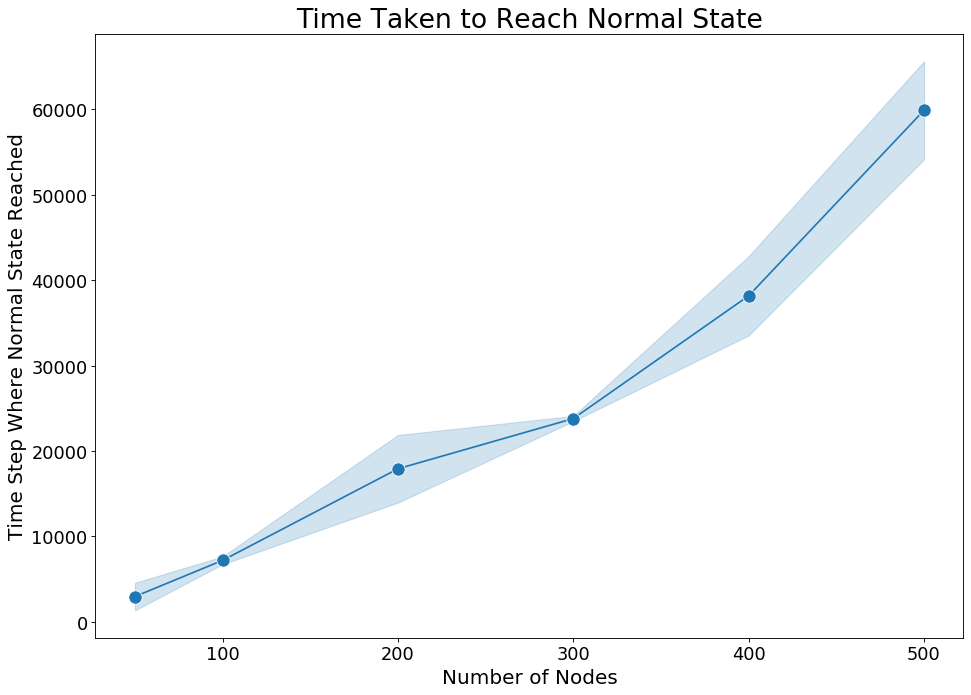

In [289]:
figure(figsize=(14, 10), dpi=80)

Graph1Sim1 = sns.lineplot(data = df_for_graph, x = "Node_Number", y = "Timestamp_Normal_Reached",
             errorbar = "sd",
            marker='o', markersize = 12)

plt.title('Time Taken to Reach Normal State', fontsize = 24)
plt.ylabel('Time Step Where Normal State Reached', fontsize = 18)
plt.xlabel('Number of Nodes', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig('Graph1Sim2.png')